# Table of Contents

01. Importing libraries
02. Importing data
03. Understanding dataset
04. Wrangling and Consistency checks
    1) dropping irrelevant columns
    2) missing values check
    3) mixed-type data
    4) univariate analysis
    5) remove duplicates
05. Data preparation
06. Exporting dataframe

## 01. Import libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 02. Import data

In [2]:
# create a variable to store the main project folder path

path=r'/Users/tejas/Documents/CareerFoundry_DataAnalytics/Data Immersion/A6/Hotel Booking'

In [3]:
path

'/Users/tejas/Documents/CareerFoundry_DataAnalytics/Data Immersion/A6/Hotel Booking'

In [4]:
# import hotel_booking.csv data set

df=pd.read_csv(os.path.join(path,'Data','Original Data','hotel_booking.csv'), index_col=False)

## 03. Understanding the dataset

In [5]:
# check the total size

df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# print the first 5 rows

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 04. Data wrangling and consistency

### Missing values check

In [8]:
# check for missing values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.isnull().sum()* 100 / len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### 'agent' and 'company' : dropping these columns since they have a lot of missing data and will not be used in the analysis.
#### 'children' : imputing the missing values with its median
#### 'country' : imputing the missing values with its mode

### Drop irrelevant columns

In [10]:
df = df.drop(['agent','company'],axis=1)

In [11]:
df['children'] = np.where(df['children'].isnull(), df['children'].median(), df['children'])

In [12]:
df['country'] = np.where(df['country'].isnull(), df['country'].mode(), df['country'])

In [13]:
# check missing values again

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [15]:
# update the data type of 'children' from float to int

df['children'] = df['children'].astype('int64')

### Mixed-type data

In [16]:
# check for mixed-type data

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

#### there is no mixed-type data

### Inconsistent data

#### I will look for inconsistent data in the dataset, that is, I will check that the unique values of the categorical columns are correct.

In [17]:
# categorical columns

cat_columns = ['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
               'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
               'customer_type', 'reservation_status']

In [18]:
# check for unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' '

#### There is 'Undefined' in meal column. However, the category 'Undefined' corresponds to 'SC' (self catering, i.e. no meals are included), as defined in the original article. Therefore, I will replace its value with 'SC'.

In [19]:
# replacing 'Undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

#### There is 'Undefined' in both 'market_segment' and 'distribution_channel' columns. Before imputing it with the mode, I will investigate these observations further.

In [20]:
df.loc[df['market_segment']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04


In [21]:
df.loc[df['distribution_channel']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,...,A,0,No Deposit,0,Transient,112.7,1,2,Check-Out,2015-07-10
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


#### There are very few rows with 'Undefined' in both variables. I will impute these with the mode. 

In [22]:
df['market_segment'] = np.where(df['market_segment']=='Undefined', df['market_segment'].mode(), df['market_segment'])

In [23]:
df['distribution_channel'] = np.where(df['distribution_channel']=='Undefined',
                                      df['distribution_channel'].mode(), df['distribution_channel'])

### creating a new column 'kids' by combining 'children' and 'babies'

In [24]:
df['kids'] = df['babies'] + df['children']

In [25]:
df.drop(['babies', 'children'], axis=1, inplace=True)

In [26]:
# check basic stats of numerical data for any outliers

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,0.111835
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,0.412561
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


#### Stats for quite a few variable seem odd and suspicious. I will investigate these further by using box plots and histograms to visualize the distribution of data and detect outliers.

### Univariate Analysis

#### 'lead_time'

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

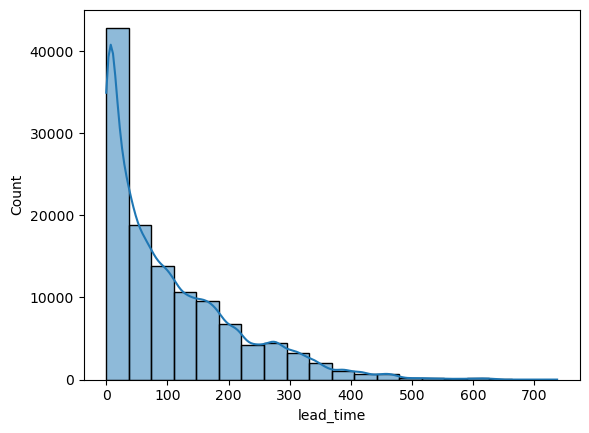

In [27]:
# histogram

sns.histplot(df['lead_time'], bins = 20, kde = True)

<AxesSubplot:xlabel='lead_time'>

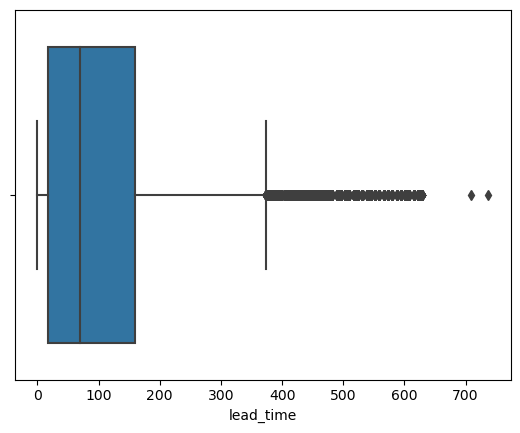

In [28]:
# boxplot

sns.boxplot(x = "lead_time", data = df)

##### The distribution is skewed to the right. There are values towards the end of the long tail which don’t occur often. These could be potential outliers. The data starts to become more dispersed starting at the value of 600, approximately. Will impute these values with the median.

In [29]:
# impute outliers with median

df['lead_time'] = np.where(df['lead_time'] > 600, df['lead_time'].median(), df['lead_time'])

#### 'stays_in_weekend_nights'

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='Count'>

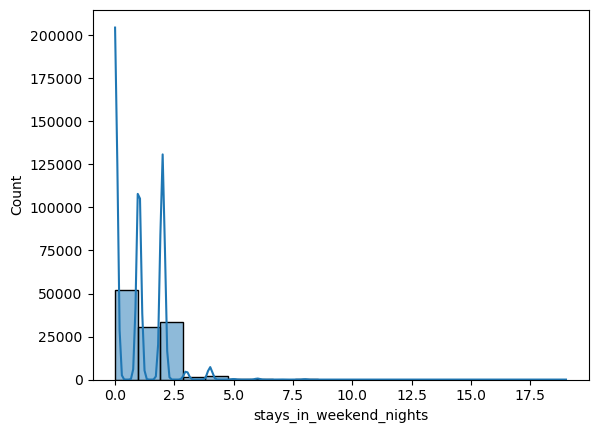

In [30]:
# histogram

sns.histplot(df['stays_in_weekend_nights'], bins = 20, kde = True)

<AxesSubplot:xlabel='stays_in_weekend_nights'>

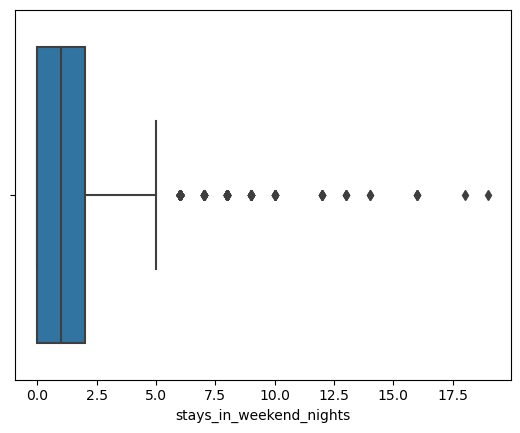

In [31]:
# boxplot

sns.boxplot(x = 'stays_in_weekend_nights', data = df)

##### 'stays_in_weekend_nights' column starts to show more dispersed data at 6
##### Will impute the outliers with the median.

In [32]:
# impute outliers with median

df['stays_in_weekend_nights'] = np.where(df['stays_in_weekend_nights'] > 6,
                                         df['stays_in_weekend_nights'].median(), df['stays_in_weekend_nights'])

#### 'stays_in_week_nights'

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='Count'>

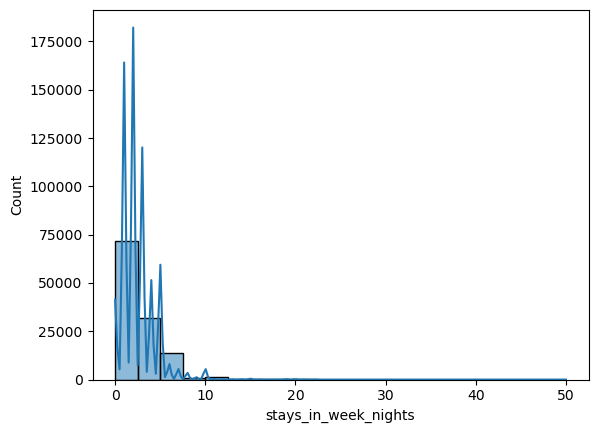

In [33]:
# histogram

sns.histplot(df['stays_in_week_nights'], bins = 20, kde = True)

<AxesSubplot:xlabel='stays_in_week_nights'>

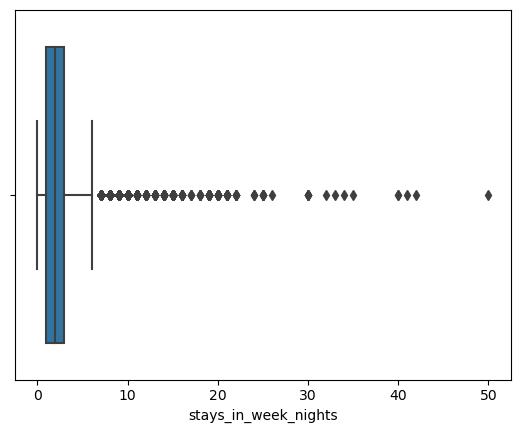

In [34]:
# boxplot

sns.boxplot(x = 'stays_in_week_nights', data = df)

##### 'stays_in_week_nights' column has many high outliers, but these values become scattered after 10
##### Will impute the outliers with the median.

In [35]:
# impute outliers with median

df['stays_in_week_nights'] = np.where(df['stays_in_week_nights'] > 10,
                                         df['stays_in_week_nights'].median(), df['stays_in_week_nights'])

#### 'adults'

<AxesSubplot:xlabel='adults', ylabel='Count'>

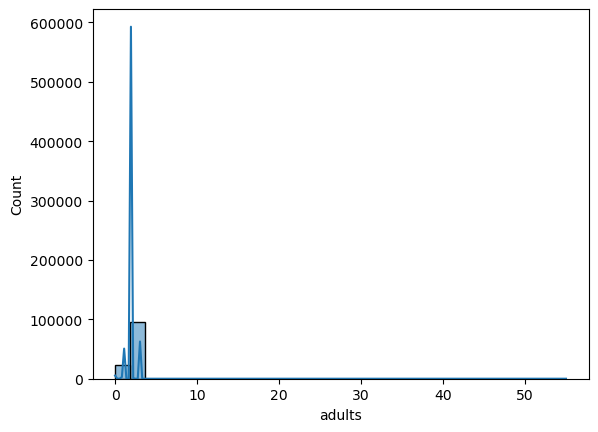

In [36]:
# histogram

sns.histplot(df['adults'], bins = 30, kde = True)

<AxesSubplot:xlabel='adults'>

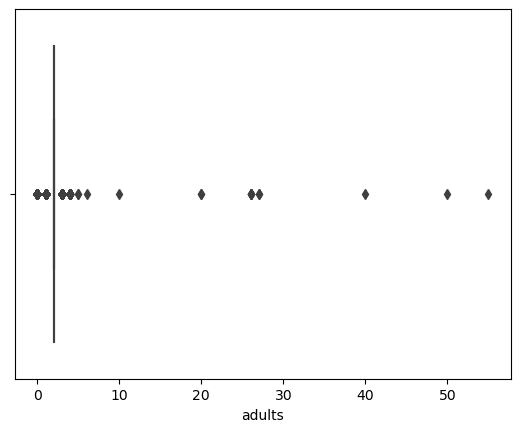

In [37]:
# boxplot

sns.boxplot(x = "adults", data = df)

##### The data for 'adults' is concentrated between 1 and 4, being unusual any reservation that exceeds this number. The minimum value is 0 adults, which is not possible since there must be a minimum of 1 adult per reservation. Since this appears to be a result of errors in the measurement, I will eliminate wherever adults = 0
##### For adults > 4, I will impute with the median since these high outlier values do not come across as errors, but extreme or rare values that are still within the range of possibility.

In [38]:
df.drop(df[df['adults'] == 0].index, inplace = True)

In [39]:
# impute outliers with median

df['adults'] = np.where((df['adults'] > 4) , df['adults'].median(), df['adults'])

#### 'kids'

<AxesSubplot:xlabel='kids', ylabel='Count'>

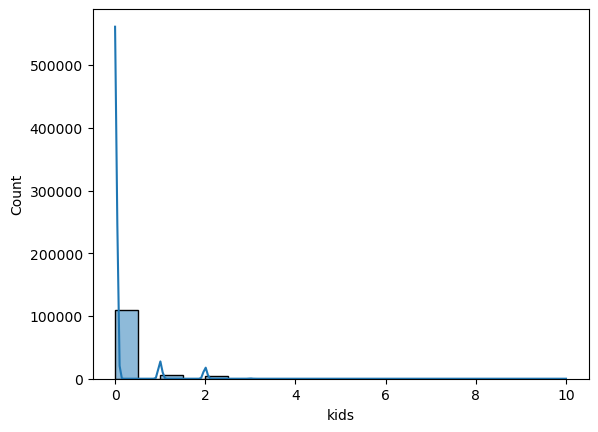

In [40]:
# histogram

sns.histplot(df['kids'], bins = 20, kde = True)

<AxesSubplot:xlabel='kids'>

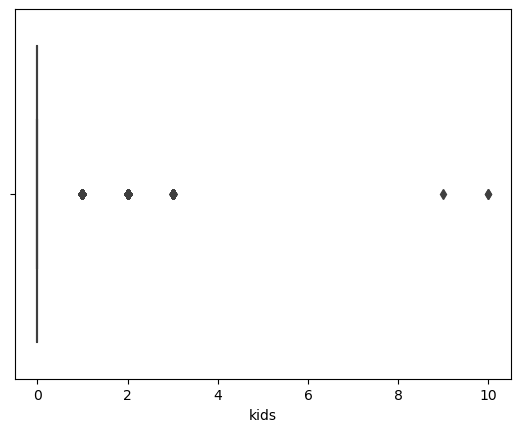

In [41]:
# boxplot

sns.boxplot(x = 'kids', data = df)

##### There are very high values such as 9 and 10 with extremely low occurrences
##### Impute these outliers with median

In [42]:
# impute outliers with median

df['kids'] = np.where((df['kids'] > 3) , df['kids'].median(), df['kids'])

#### 'previous_cancellations'

<AxesSubplot:xlabel='previous_cancellations', ylabel='Count'>

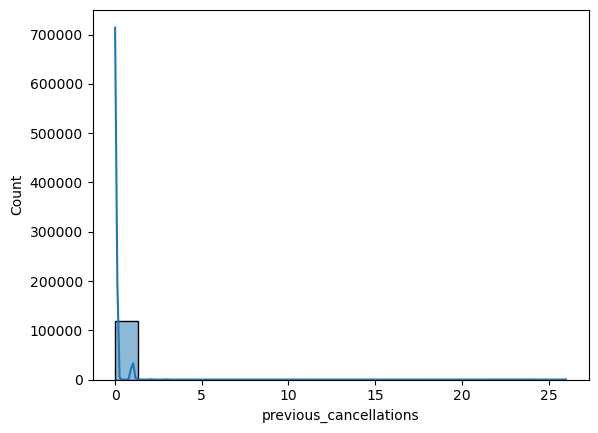

In [43]:
# histogram

sns.histplot(df['previous_cancellations'], bins = 20, kde = True)

<AxesSubplot:xlabel='previous_cancellations'>

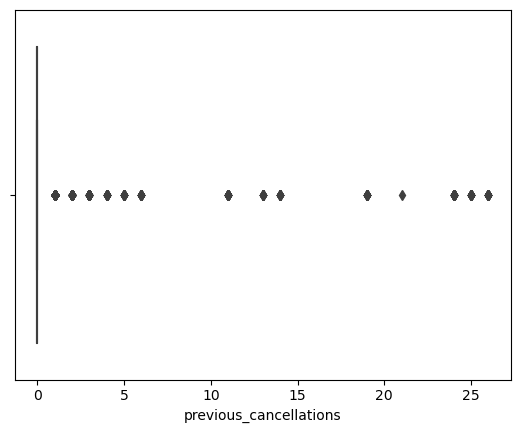

In [44]:
# boxplot

sns.boxplot(x = 'previous_cancellations', data = df)

##### 'previous_cancellations' column refers to the number of previous bookings that were cancelled by the customer prior to the current booking.
##### From the above two plots, this variable reaches very high values. For example, there are few cases where a guest made more than 20 cancellations prior to the current booking. But these are only a few instances as 98% of the data for the variable shows 0 cancellations.

##### I have therefore decided to convert it into a categorical variable, where 0 means that the guest did not cancel a reservation at the hotel prior to the current reservation and 1 means that it did occur, at least once.

In [45]:
# impute outliers and change into categorical variable

df.loc[df['previous_cancellations'] > 0, ['previous_cancellations']] = 1

#### 'previous_bookings_not_canceled'

<AxesSubplot:xlabel='previous_bookings_not_canceled', ylabel='Count'>

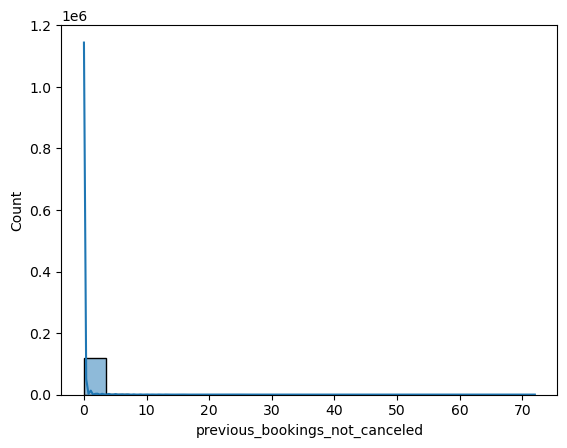

In [46]:
# histogram

sns.histplot(df['previous_bookings_not_canceled'], bins = 20, kde = True)

<AxesSubplot:xlabel='previous_bookings_not_canceled'>

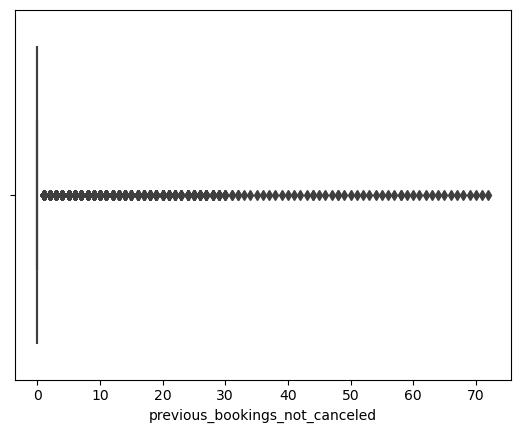

In [47]:
# boxplot

sns.boxplot(x = 'previous_bookings_not_canceled', data = df)

##### 'previous_bookings_not_canceled' column refers to the number of previous bookings not cancelled by the customer prior to the current booking.
##### Similar to 'previous_cancellations', this variable reaches very high values. However, 96% of the data for the variable has a value of 0.

##### I have therefore decided to convert it into a categorical variable, where 0 means that the guest cancelled a reservation at the hotel prior to the current reservation and 1 means that it was not cancelled.

In [48]:
# impute outliers and change into categorical variable

df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1

#### 'booking_changes'

<AxesSubplot:xlabel='booking_changes', ylabel='Count'>

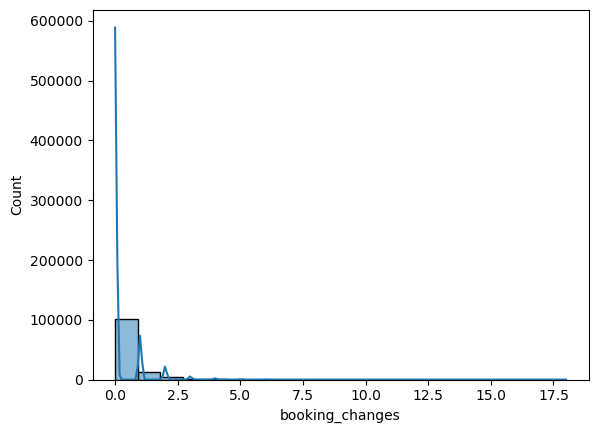

In [49]:
# histogram

sns.histplot(df['booking_changes'], bins = 20, kde = True)

<AxesSubplot:xlabel='booking_changes'>

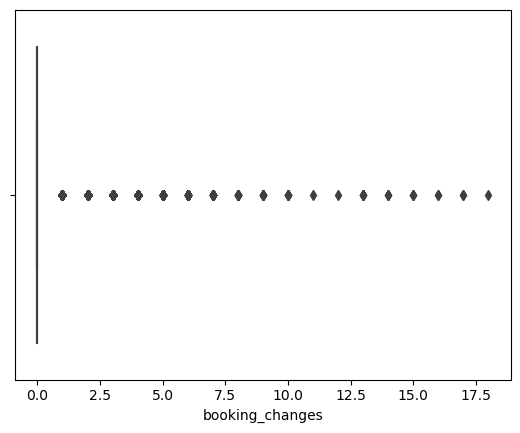

In [50]:
# boxplot

sns.boxplot(x = 'booking_changes', data = df)

##### Seeing the distribution in the above two plots, it appears to be extremely unusual for a booking to have more than 5 changes. There is only 1% data comprising to booking changes for over 5.
##### Will impute the outliers with the median.

In [51]:
# impute outliers with median

df['booking_changes'] = np.where((df['booking_changes'] > 5) , df['booking_changes'].median(), df['booking_changes'])

#### 'days_in_waiting_list'

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Count'>

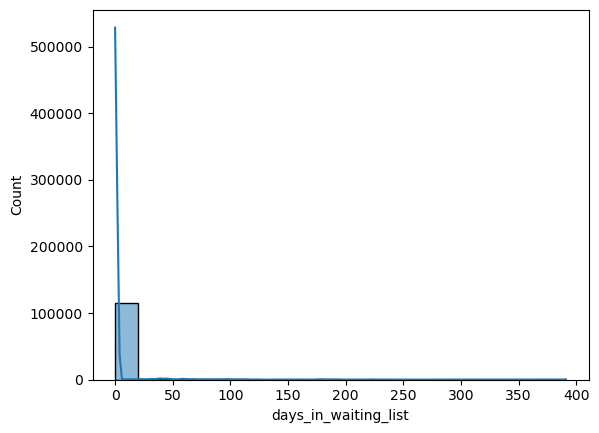

In [52]:
# histogram

sns.histplot(df['days_in_waiting_list'], bins = 20, kde = True)

<AxesSubplot:xlabel='days_in_waiting_list'>

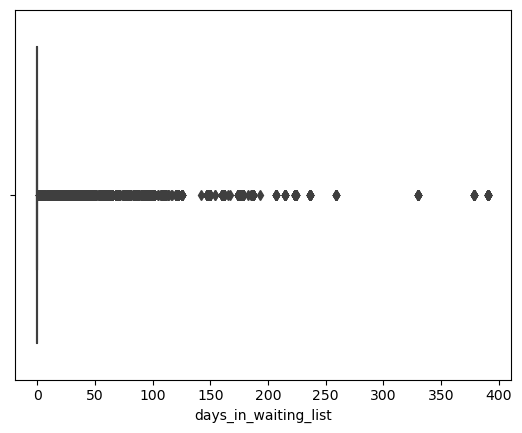

In [53]:
# boxplot

sns.boxplot(x = 'days_in_waiting_list', data = df)

##### 'days_in_waiting_list' columns refers to the number of days the booking was in the waiting list before it was confirmed to the customer.
##### From the above two plots, the data is very sparse, being unusual for a reservation to have a waiting period of more than 1 day, practically.
##### Will impute the outliers with a value of 1.

In [54]:
# impute outliers

df.loc[df['days_in_waiting_list'] > 0,  ['days_in_waiting_list']] = 1

#### 'adr'

<AxesSubplot:xlabel='adr', ylabel='Count'>

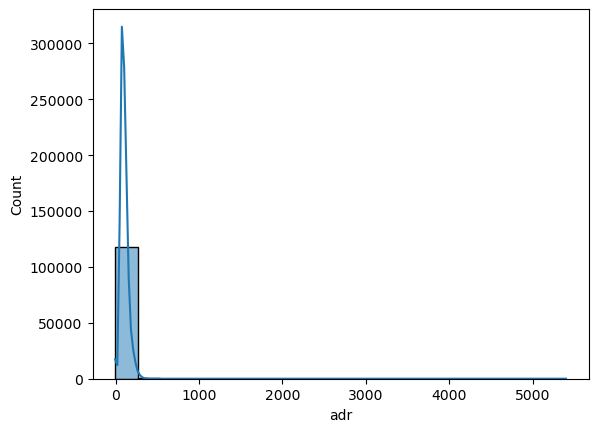

In [55]:
# histogram

sns.histplot(df['adr'], bins = 20, kde = True)

<AxesSubplot:xlabel='adr'>

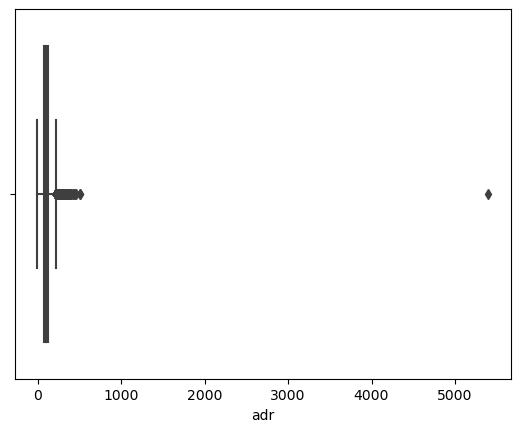

In [56]:
# boxplot

sns.boxplot(x = 'adr', data = df)

##### 'adr' value cannot be negative. There is another value of 5400 which is extremely high when compared to the mean of 102. Since this could be an error, it would be better to remove it.

In [57]:
df.drop(df[df['adr'] == 5400].index, inplace = True)

In [58]:
df.drop(df[df['adr'] < 0].index, inplace = True)

#### 'required_car_parking_spaces'

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='Count'>

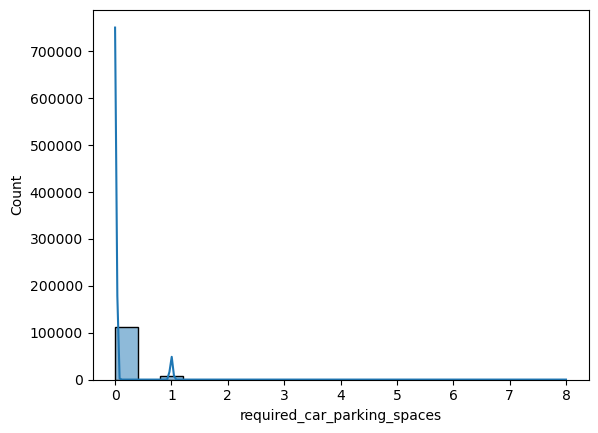

In [59]:
# histogram

sns.histplot(df['required_car_parking_spaces'], bins = 20, kde = True)

<AxesSubplot:xlabel='required_car_parking_spaces'>

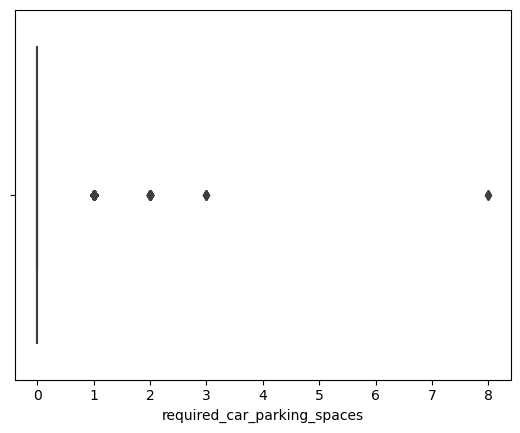

In [60]:
# boxplot

sns.boxplot(x = 'required_car_parking_spaces', data = df)

##### There are very few instances with the value 8 for car parking space. It appears to be a deviation from the rest of the values for this variable. Additionally, I will also cross-check to see the number of guests for this observation to understand if the value is legit or not.

In [61]:
df['adults'].loc[df['required_car_parking_spaces']==8]

29045    2.0
29046    2.0
Name: adults, dtype: float64

##### Both rows have only 2 adults listed. Does not make sense for 2 adults to book a car parking space of 8. Will impute the outlier value with the median.

In [62]:
# impute outliers with median

df['required_car_parking_spaces'] = np.where((df['required_car_parking_spaces'] > 3), 
                                             df['required_car_parking_spaces'].median(), df['required_car_parking_spaces'])

#### Outliers will not have completely disappeared, but they will no longer have such an impact on the results of the analysis.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  float64
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  float64
 8   stays_in_week_nights            118985 non-null  float64
 9   adults                          118985 non-null  float64
 10  meal                            118985 non-null  object 
 11  country                         118985 non-null  object 
 12  market_segment  

In [64]:
# update the data type of recently modified variables from float to int where needed

df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'kids', 'booking_changes', 'required_car_parking_spaces']] = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'kids', 'booking_changes', 'required_car_parking_spaces']].astype('int64')

### Duplicate values check

In [65]:
# check how many duplicate records exist

sum(df.duplicated())

32069

In [66]:
# drop duplicate records

df=df.drop_duplicates()

In [67]:
# check the updated dataframe size

df.shape

(86916, 29)

## 05. Data preparation

### creating a new column 'guest_type' for customer segmentation

In [68]:
# create 'guest_type' using loc function

df.loc[(df['adults']==1) & (df['kids']==0), 'guest_type']='Single'

df.loc[(df['adults']==2) & (df['kids']==0), 'guest_type']='Couple'

df.loc[(df['adults']>=1) & (df['kids']>=1), 'guest_type']='Family'

df.loc[(df['adults']>2) & (df['kids']==0), 'guest_type']='Group'

In [69]:
# check the output

df['guest_type'].value_counts(dropna=False)

Couple    56564
Single    16014
Family     8878
Group      5460
Name: guest_type, dtype: int64

In [70]:
# create a column for total no. of guests

df['total_guests'] = df['adults'] + df['kids']

In [71]:
# create a column for total no. of night stays

df['stays_in_total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [72]:
df['stays_in_total_nights'].describe()

count    86916.000000
mean         3.567180
std          2.453392
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: stays_in_total_nights, dtype: float64

In [73]:
# converting string month to numerical (Dec = 12, Jan = 1, etc.)

arrival_month_num = pd.to_datetime(df.arrival_date_month, format='%B').dt.month

In [74]:
# creating the arrival date column by concatenating date component columns

df['arrival_date'] = pd.to_datetime((df['arrival_date_year'].map(str) + "-" +
                                     pd.to_datetime(df.arrival_date_month, format='%B').dt.month.map(str) + "-" +
                                     df['arrival_date_day_of_month'].map(str)),yearfirst=True)

#### 'is_canceled' is an important variable in this realm. Since it is categorical, I will create a new column 'cancellation_rate' based on 'is_canceled' by grouping 'lead_time' to further explore hotel booking cancellations by its lead time.

In [75]:
dict_lead_time_cancel_perc=round((df.groupby('lead_time')['is_canceled'].mean()*100), 2).to_dict()

In [76]:
df['cancellation_rate']=df['lead_time'].map(dict_lead_time_cancel_perc)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86916 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86916 non-null  object        
 1   is_canceled                     86916 non-null  int64         
 2   lead_time                       86916 non-null  int64         
 3   arrival_date_year               86916 non-null  int64         
 4   arrival_date_month              86916 non-null  object        
 5   arrival_date_week_number        86916 non-null  int64         
 6   arrival_date_day_of_month       86916 non-null  int64         
 7   stays_in_weekend_nights         86916 non-null  int64         
 8   stays_in_week_nights            86916 non-null  int64         
 9   adults                          86916 non-null  int64         
 10  meal                            86916 non-null  object        
 11  c

In [78]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'guest_type',
       'total_guests', 'stays_in_total_nights', 'arrival_date',
       'cancellation_rate'],
      dtype='object')

In [79]:
# re-arrange columns

cols=['hotel', 'is_canceled', 'lead_time', 'cancellation_rate', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'stays_in_total_nights', 'adults', 'kids', 'total_guests', 'guest_type', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

In [80]:
df=df[cols]

In [81]:
df.head()

,hotel,is_canceled,lead_time,cancellation_rate,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date,stays_in_weekend_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,32.56,2015,July,27,1,2015-07-01,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,69,34.82,2015,July,27,1,2015-07-01,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,12.75,2015,July,27,1,2015-07-01,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,20.26,2015,July,27,1,2015-07-01,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,21.43,2015,July,27,1,2015-07-01,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### The above stats look good to go!

## 06. Export dataframe

In [82]:
# export the dataframe to csv

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'hotel_booking_cleaned.csv'))